# Training Models for classification

## Loading Data

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from scripts.plotter import plot_decision_regions

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2, 3]]
y = iris.target

In [4]:
print(f'Class labels: {np.unique(y)}')

Class labels: [0 1 2]


## Preprocessing data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [6]:
print(f'Labels count in y: {np.bincount(y)}')
print(f'Labels count in y_train: {np.bincount(y_train)}')
print(f'Labels count in y_test: {np.bincount(y_test)}')

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Training a Logistic Regression model

In [11]:
lr_model = LogisticRegression(
    C=100.0,
    solver='lbfgs',
    multi_class='ovr'
)

In [12]:
lr_model.fit(X_train_std, y_train)

/home/francisco/Documentos/machine-learning-for-developers/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100.0, multi_class='ovr')

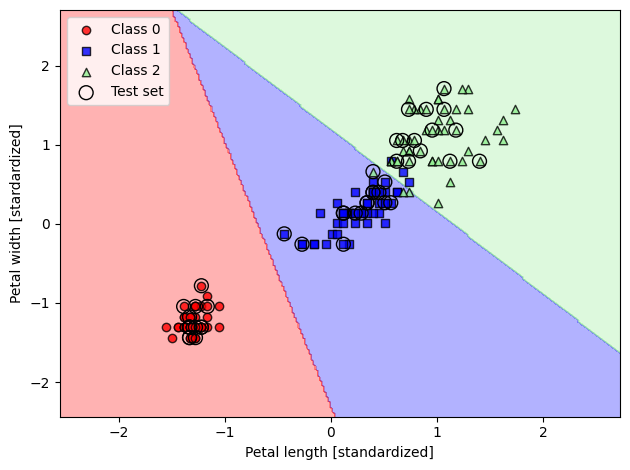

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=lr_model,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [stardardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
list_probas = list(lr_model.predict_proba(X_test_std[:3, :]))
list_probas

[array([6.63770505e-09, 1.44747233e-01, 8.55252760e-01]),
 array([8.34031210e-01, 1.65968790e-01, 3.20815954e-13]),
 array([8.48822884e-01, 1.51177116e-01, 2.57998350e-14])]

In [32]:
labels = [np.argmax(i) for i in list_probas]
labels

[np.int64(2), np.int64(0), np.int64(0)]

## Support Vector Machines

In [8]:
from sklearn.svm import SVC

In [9]:
svm_model = SVC(kernel='linear', C=1.0, random_state=1)
svm_model.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

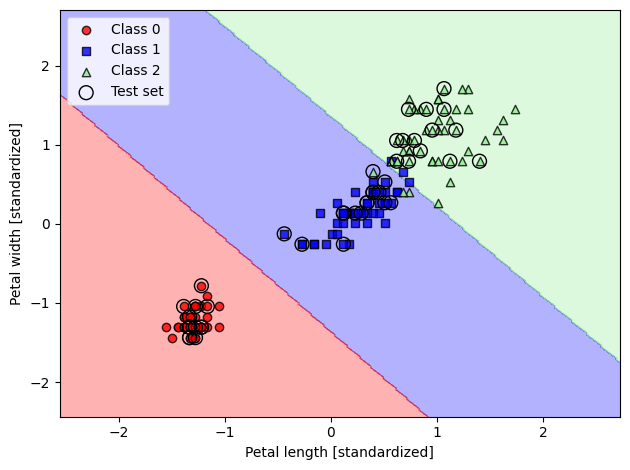

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=svm_model,
    test_idx=range(105, 150)
)
plt.xlabel("Petal length [standardized]")
plt.ylabel("Petal width [standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Kernel SVM

In [12]:
np.random.seed(1)

In [25]:
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(
    X_xor[:, 0] > 0,
    X_xor[:, 1] > 0,
)
y_xor = np.where(y_xor, 1, 0)

In [26]:
y_xor

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0])

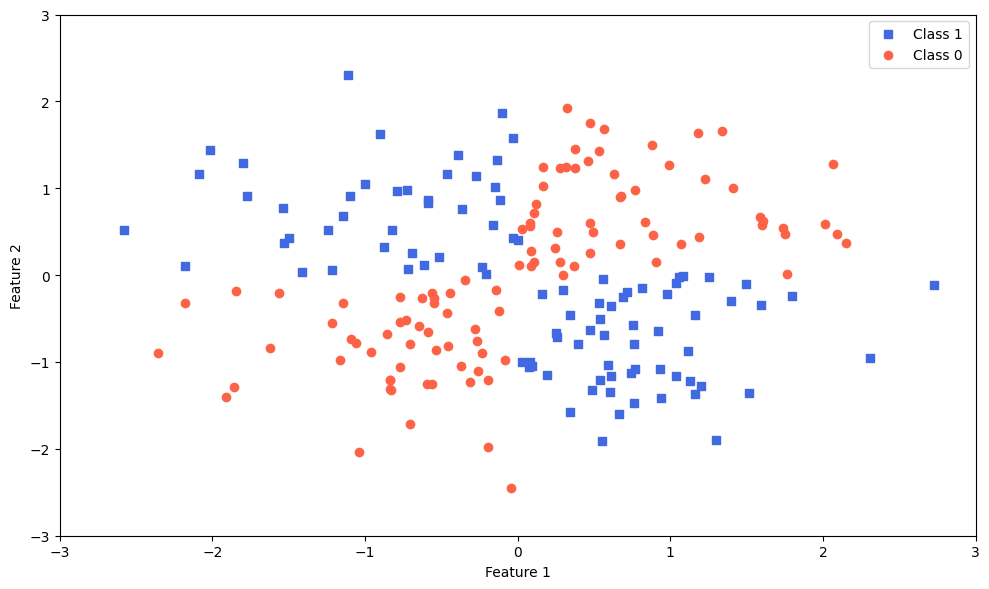

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(
    X_xor[y_xor == 1, 0],
    X_xor[y_xor == 1, 1],
    c='royalblue',
    marker='s',
    label='Class 1'
)

plt.scatter(
    X_xor[y_xor == 0, 0],
    X_xor[y_xor == 0, 1],
    c='tomato',
    marker='o',
    label='Class 0'
)

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [28]:
svm_model = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm_model.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

UnboundLocalError: cannot access local variable 'X_test' where it is not associated with a value

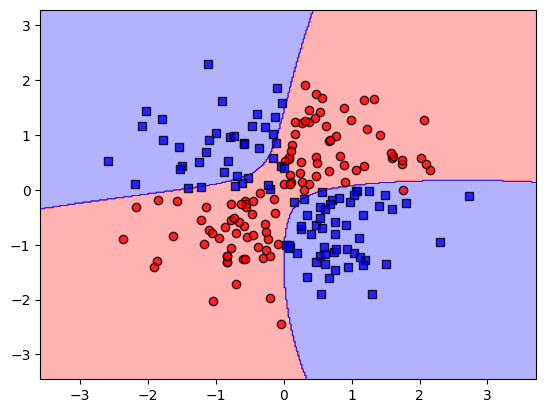

In [30]:
plot_decision_regions(X_xor, y_xor, classifier=svm_model, test_idx=None)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Decision Tree Learning

In [31]:
def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2((1-p))

In [32]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

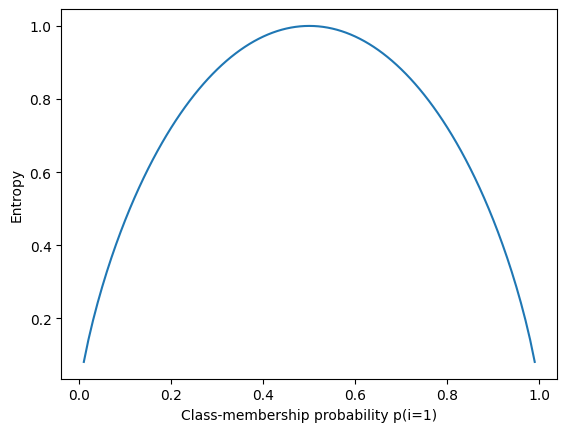

In [33]:
plt.plot(x, ent)
plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=1
)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

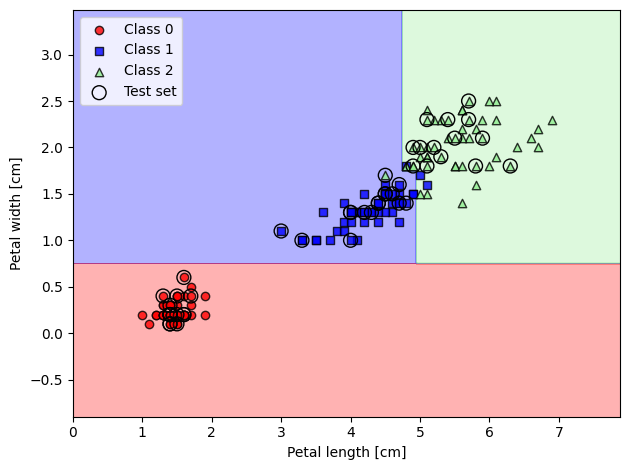

In [9]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined,
    y_combined,
    classifier=tree_model,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
forest_model = RandomForestClassifier(
    n_estimators=25,
    random_state=1,
    n_jobs=-1
)

In [13]:
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

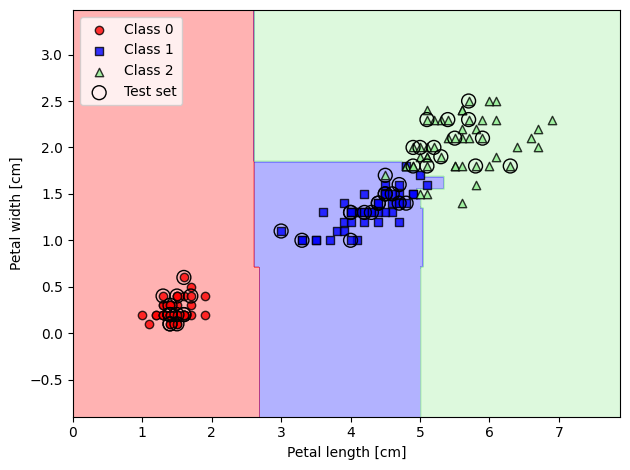

In [14]:
plot_decision_regions(
    X_combined,
    y_combined,
    classifier=forest_model,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## K-neares neighbors - KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    p=2,
    metric="minkowski"
)

knn_model.fit(X_train_std, y_train)

KNeighborsClassifier()

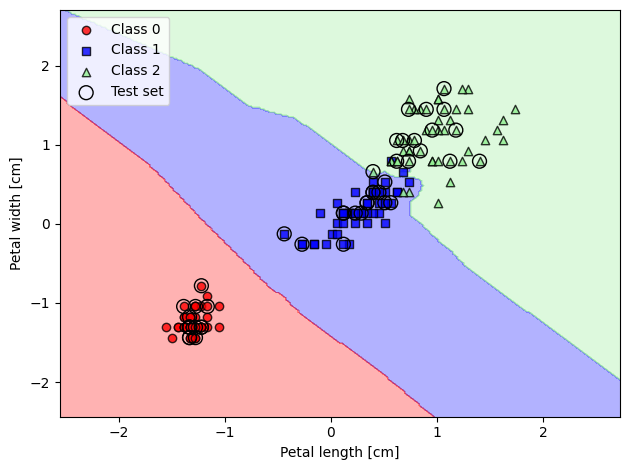

In [20]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined_std,
    y_combined,
    classifier=knn_model,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()